# BELTRANS statistics

This notebook displays statistics about the BELTRANS corpus. It aims to measure the improvement performed by different data integration or enrichment techniques.


In [23]:
import pandas as pd
import utils
import utils_stats
import utils_plot
from datetime import datetime

## Existing measurements

The measured statistics currently evolve like this:



In [24]:
translationMeasurementFiles = [
    '2022-05-03-translation-stats.csv', '2022-05-09-translation-stats.csv', 
    '2022-05-23-translation-stats.csv', '2022-06-07-translation-stats.csv',
    '2022-06-16-translation-stats.csv', '2022-06-20-translation-stats.csv',
    '2022-06-23-translation-stats.csv', '2022-06-24-translation-stats.csv',
    '2022-07-18-translation-stats.csv'
]

In [25]:
translationStats = utils_stats.mergeMeasurementsToDataFrame('./measurements', translationMeasurementFiles)
statsFRNL = translationStats[translationStats['corpus'] == 'FR-NL'].copy()
statsNLFR = translationStats[translationStats['corpus'] == 'NL-FR'].copy()
statsOther = translationStats[translationStats['corpus'] == 'OTHER'].copy()

## Identifiers
The total number of translations and how much have which third party identifier.

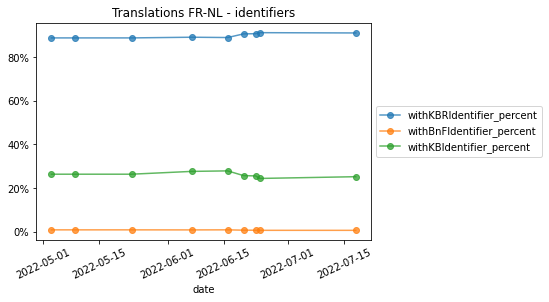

In [26]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier'],
                                  'Translations FR-NL - identifiers',
                                 'numberTranslations')

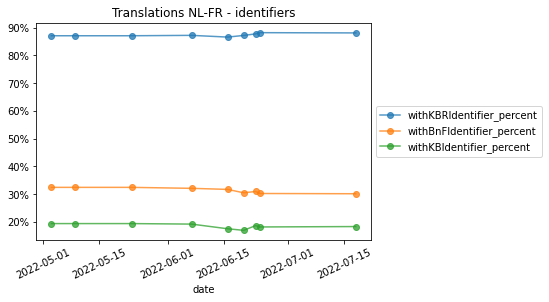

In [27]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier'],
                                  'Translations NL-FR - identifiers',
                                 'numberTranslations')

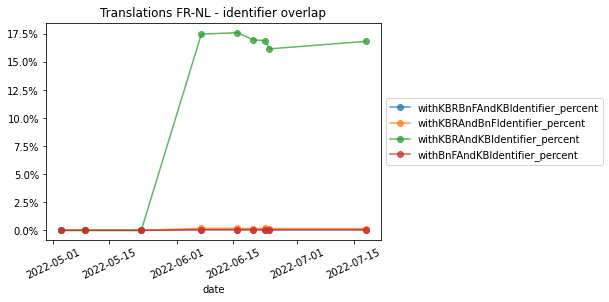

In [5]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier',
                                  'withKBRAndKBIdentifier', 'withBnFAndKBIdentifier'],
                                  'Translations FR-NL - identifier overlap',
                                 'numberTranslations')

Because of the outlier KBR&KB below a graph without that line

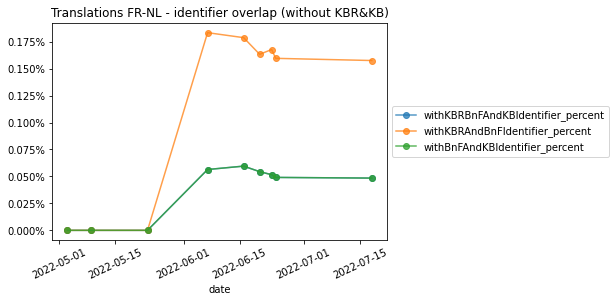

In [6]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier', 'withBnFAndKBIdentifier'],
                                  'Translations FR-NL - identifier overlap (without KBR&KB)',
                                 'numberTranslations')

In [7]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date       | comment                                                                                                                                                                   |
|:-----------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                                                              |
| 2022-05-09 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246.                                              |
| 2022-05-23 | No changes to previous version.                                                                                                                                           |
| 2022-06-07 | Added publishing directors and included a collumn for source titles from KB                                                                                               |
| 2022-06-16 | Removed duplicate manifestations with the same ISBN10/ISBN13                                                                                                              |
| 2022-06-20 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL                                                                                         |
| 2022-06-23 | No ISBN duplicate removal anymore to prevent data loss                                                                                                                    |
| 2022-06-24 | New KBR dump with old Dutch, old French and middle French as well as new data in general                                                                                  |
| 2022-07-18 | Dataprofile query filtering also for Belgian organizations, not just Belgian persons (KB data was also updated from SPARQL endpoint, but did not cause more translations) |

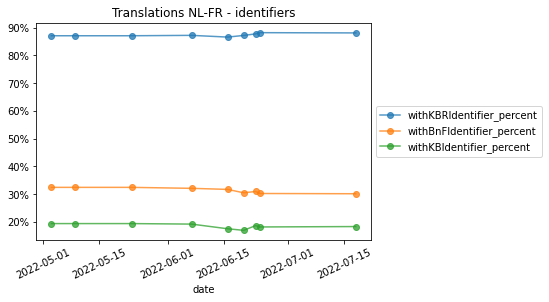

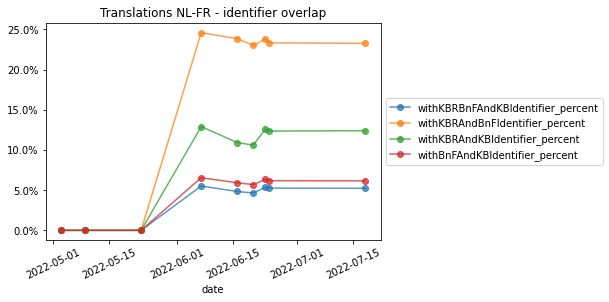

In [9]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier',
                                  'withKBRAndKBIdentifier', 'withBnFAndKBIdentifier'],
                                  'Translations NL-FR - identifier overlap',
                                 'numberTranslations')

## ISBN identifiers
The total number of translations and how many have ISBN10/ISBN13.

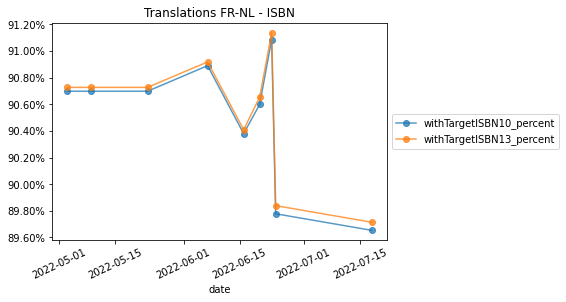

In [10]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withTargetISBN10', 'withTargetISBN13'],
                                  'Translations FR-NL - ISBN',
                                 'numberTranslations')

In [11]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date       | comment                                                                                                                                                                   |
|:-----------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                                                              |
| 2022-05-09 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246.                                              |
| 2022-05-23 | No changes to previous version.                                                                                                                                           |
| 2022-06-07 | Added publishing directors and included a collumn for source titles from KB                                                                                               |
| 2022-06-16 | Removed duplicate manifestations with the same ISBN10/ISBN13                                                                                                              |
| 2022-06-20 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL                                                                                         |
| 2022-06-23 | No ISBN duplicate removal anymore to prevent data loss                                                                                                                    |
| 2022-06-24 | New KBR dump with old Dutch, old French and middle French as well as new data in general                                                                                  |
| 2022-07-18 | Dataprofile query filtering also for Belgian organizations, not just Belgian persons (KB data was also updated from SPARQL endpoint, but did not cause more translations) |

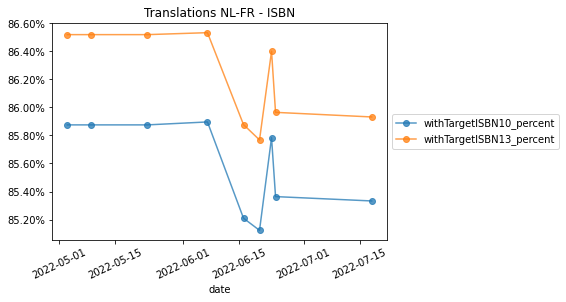

In [12]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withTargetISBN10', 'withTargetISBN13'],
                                  'Translations NL-FR - ISBN',
                                 'numberTranslations')

## Information about original of translation (source)
The total number of translation and for how many we have which kind of information for the original.

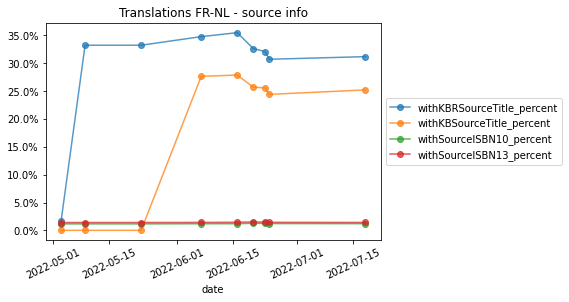

In [13]:
utils_plot.plotPercentageTimeline(statsFRNL,
                                  ['withKBRSourceTitle', 'withKBSourceTitle', 'withSourceISBN10', 'withSourceISBN13'],
                                  'Translations FR-NL - source info',
                                 'numberTranslations')

In [14]:
from IPython.display import display, Markdown
display(Markdown(statsFRNL['comment'].to_markdown()))

| date       | comment                                                                                                                                                                   |
|:-----------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers.                                                                                              |
| 2022-05-09 | Data integrated from KBR, BnF and KB based on ISBN10 and ISBN13 identifiers. Additionally KBR original title from field 246.                                              |
| 2022-05-23 | No changes to previous version.                                                                                                                                           |
| 2022-06-07 | Added publishing directors and included a collumn for source titles from KB                                                                                               |
| 2022-06-16 | Removed duplicate manifestations with the same ISBN10/ISBN13                                                                                                              |
| 2022-06-20 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL                                                                                         |
| 2022-06-23 | No ISBN duplicate removal anymore to prevent data loss                                                                                                                    |
| 2022-06-24 | New KBR dump with old Dutch, old French and middle French as well as new data in general                                                                                  |
| 2022-07-18 | Dataprofile query filtering also for Belgian organizations, not just Belgian persons (KB data was also updated from SPARQL endpoint, but did not cause more translations) |

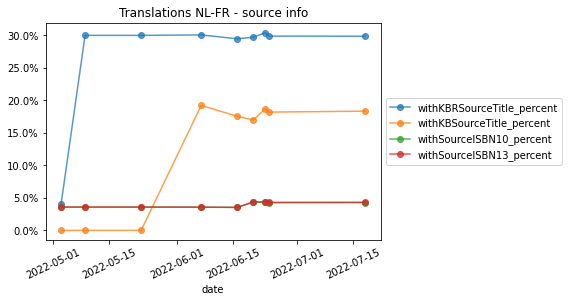

In [15]:
utils_plot.plotPercentageTimeline(statsNLFR,
                                  ['withKBRSourceTitle', 'withKBSourceTitle', 'withSourceISBN10', 'withSourceISBN13'],
                                  'Translations NL-FR - source info',
                                 'numberTranslations')

In [16]:
statsNLFR

,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,...,withKBRBnFAndKBIdentifier_percent,withKBRAndBnFIdentifier_percent,withKBRAndKBIdentifier_percent,withBnFAndKBIdentifier_percent,withTargetISBN10_percent,withTargetISBN13_percent,withKBRSourceTitle_percent,withKBSourceTitle_percent,withSourceISBN10_percent,withSourceISBN13_percent
date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,NL-FR,3731,3204,3228,3249,1211,724,0,0,0,...,0.000000,0.000000,0.000000,0.000000,85.875101,86.518360,3.993567,0.000000,3.564728,3.591530
2022-05-09,NL-FR,3731,3204,3228,3249,1211,724,0,0,0,...,0.000000,0.000000,0.000000,0.000000,85.875101,86.518360,29.991959,0.000000,3.564728,3.591530
2022-05-23,NL-FR,3731,3204,3228,3249,1211,724,0,0,0,...,0.000000,0.000000,0.000000,0.000000,85.875101,86.518360,29.991959,0.000000,3.564728,3.591530
2022-06-07,NL-FR,3772,3240,3264,3290,1211,725,208,928,487,...,5.514316,24.602333,12.910923,6.548250,85.896076,86.532344,30.063627,19.220573,3.552492,3.579003
2022-06-16,NL-FR,3597,3065,3089,3115,1141,631,174,858,393,...,4.837364,23.853211,10.925771,5.921601,85.209897,85.877120,29.469002,17.542396,3.530720,3.530720
2022-06-20,NL-FR,3724,3170,3194,3247,1136,632,173,857,395,...,4.645542,23.012889,10.606874,5.692803,85.123523,85.767991,29.699248,16.970999,4.323308,4.377014
2022-06-23,NL-FR,3897,3343,3367,3420,1207,728,208,928,491,...,5.337439,23.813190,12.599435,6.338209,85.783936,86.399795,30.408006,18.681037,4.336669,4.387991
2022-06-24,NL-FR,3997,3412,3436,3525,1209,727,210,933,494,...,5.253940,23.342507,12.359269,6.179635,85.364023,85.964473,29.872404,18.188641,4.253190,4.303227
2022-07-18,NL-FR,4009,3421,3445,3532,1209,735,210,933,497,...,5.238214,23.272637,12.397107,6.161137,85.333001,85.931654,29.857820,18.333749,4.265403,4.315291


In [17]:
statsFRNL

,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,...,withKBRBnFAndKBIdentifier_percent,withKBRAndBnFIdentifier_percent,withKBRAndKBIdentifier_percent,withBnFAndKBIdentifier_percent,withTargetISBN10_percent,withTargetISBN13_percent,withKBRSourceTitle_percent,withKBSourceTitle_percent,withSourceISBN10_percent,withSourceISBN13_percent
date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,FR-NL,6891,6250,6252,6125,58,1817,0,0,0,...,0.000000,0.000000,0.000000,0.000000,90.698012,90.727035,1.610797,0.000000,1.160935,1.407633
2022-05-09,FR-NL,6891,6250,6252,6125,58,1817,0,0,0,...,0.000000,0.000000,0.000000,0.000000,90.698012,90.727035,33.246263,0.000000,1.160935,1.407633
2022-05-23,FR-NL,6891,6250,6252,6125,58,1817,0,0,0,...,0.000000,0.000000,0.000000,0.000000,90.698012,90.727035,33.246263,0.000000,1.160935,1.407633
2022-06-07,FR-NL,7091,6445,6447,6325,58,1961,4,13,1240,...,0.056410,0.183331,17.486955,0.056410,90.889860,90.918065,34.790580,27.654774,1.184600,1.424341
2022-06-16,FR-NL,6715,6069,6071,5980,57,1873,4,12,1183,...,0.059568,0.178704,17.617275,0.059568,90.379747,90.409531,35.502606,27.892777,1.191363,1.444527
2022-06-20,FR-NL,7350,6659,6663,6669,51,1890,4,12,1248,...,0.054422,0.163265,16.979592,0.054422,90.598639,90.653061,32.639456,25.714286,1.265306,1.510204
2022-06-23,FR-NL,7752,7061,7065,7040,52,1983,4,13,1310,...,0.051600,0.167699,16.898865,0.051600,91.086171,91.137771,32.107843,25.580495,1.238390,1.470588
2022-06-24,FR-NL,8149,7316,7321,7439,51,1990,4,13,1318,...,0.049086,0.159529,16.173764,0.049086,89.777887,89.839244,30.727697,24.420174,1.214873,1.435759
2022-07-18,FR-NL,8254,7400,7405,7524,51,2082,4,13,1390,...,0.048461,0.157499,16.840320,0.048461,89.653501,89.714078,31.196995,25.224134,1.199418,1.417495


## All statistics for the 'other' corpus
Compared to above things are only in one graph

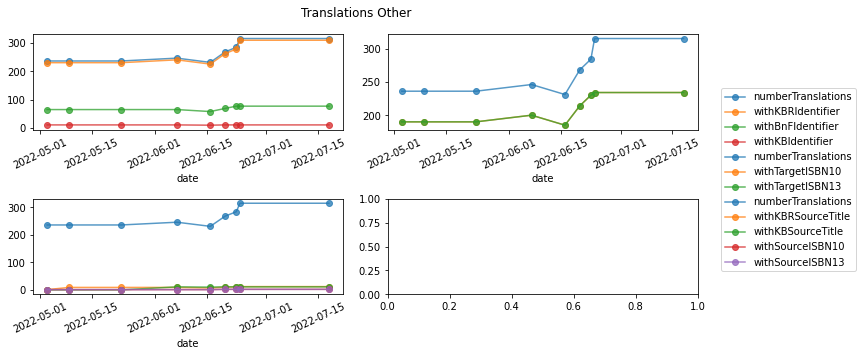

In [18]:
utils_plot.plotTranslationStats(statsOther, 'Translations Other')

In [19]:
statsOther

,corpus,numberTranslations,withTargetISBN10,withTargetISBN13,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,withBnFAndKBIdentifier,withBBThesaurusID,withSourceKBRIdentifier,withKBRSourceTitle,withKBSourceTitle,withSourceISBN10,withSourceISBN13,comment
date,,,,,,,,,,,,,,,,,,
2022-05-03,OTHER,236,190,190,230,65,11,0,0,0,0,201,1,1,0,1,1,"Data integrated from KBR, BnF and KB based on ..."
2022-05-09,OTHER,236,190,190,230,65,11,0,0,0,0,201,1,9,0,1,1,"Data integrated from KBR, BnF and KB based on ..."
2022-05-23,OTHER,236,190,190,230,65,11,0,0,0,0,201,1,9,0,1,1,No changes to previous version.
2022-06-07,OTHER,246,200,200,240,65,11,2,59,10,3,211,1,9,11,1,1,Added publishing directors and included a coll...
2022-06-16,OTHER,231,185,185,225,58,10,1,52,9,2,201,1,7,10,1,1,Removed duplicate manifestations with the same...
2022-06-20,OTHER,268,214,214,262,69,11,2,63,10,3,231,3,10,11,2,2,New KBR data dump with plenty of additions and...
2022-06-23,OTHER,284,230,230,278,77,11,2,71,10,3,243,3,11,11,2,2,No ISBN duplicate removal anymore to prevent d...
2022-06-24,OTHER,315,234,234,309,77,11,2,71,10,3,273,4,12,11,2,2,"New KBR dump with old Dutch, old French and mi..."
2022-07-18,OTHER,315,234,234,309,77,11,2,71,10,3,273,4,12,11,2,2,Dataprofile query filtering also for Belgian o...


## Contributors

In [2]:
contributorMeasurementFiles = [
    '2022-05-03_person-contributor-stats.csv', '2022-05-23_person-contributor-stats.csv',
    '2022-06-16_person-contributor-stats.csv', '2022-05-09_person-contributor-stats.csv',
    '2022-06-07_person-contributor-stats.csv', '2022-06-20_person-contributor-stats.csv',
    '2022-06-23_person-contributor-stats.csv', '2022-06-24_person-contributor-stats.csv',
    '2022-07-18_person-contributor-stats.csv'
]

In [3]:
contributorStats = utils_stats.mergeMeasurementsToDataFrame('./measurements', contributorMeasurementFiles)

The following two plots show the proportion and integration of person contributor identifiers from our three main data sources in the corpus: KBR, BnF and KB. Most contributors have a KBR identifier.

Initially, the proportion of identifiers of these 3 sources was very low, because the contributor list also showed Belgians from the ISNI data dump which were actually not contributing to the corpus books. From the version of `2022-05-23` only actual contributors were counted, thus the proportions reflect the actual contributors.

### Identifiers overview

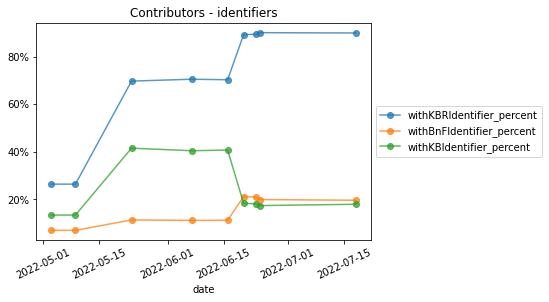

In [4]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier'],
                                  'Contributors - identifiers',
                                 'numberContributors')

In [21]:
contributorStats[['numberContributors', 'withKBRIdentifier', 'withBnFIdentifier', 'withKBIdentifier']].sort_index()

,numberContributors,withKBRIdentifier,withBnFIdentifier,withKBIdentifier
date,,,,
2022-05-03,48835,12850,3357,6499
2022-05-09,48835,12850,3357,6499
2022-05-23,15681,10923,1764,6499
2022-06-07,16100,11342,1780,6499
2022-06-16,15991,11233,1779,6499
2022-06-20,5843,5214,1231,1063
2022-06-23,5901,5272,1232,1067
2022-06-24,6243,5621,1237,1079
2022-07-18,6352,5711,1241,1134


For the corpus of `2022-05-23` we only started to count contributors with at least a KBR, BnF or KB identifier. We did this, because otherwise we have plenty of persons from the ISNI Belgian dump who did not even contribute anything to the BELTRANS corpus. **The total number of contributors decreased** and hence the **proportion of KBR, BnF and KB authorities increased** due to a different total. 

For the corpus of `2022-06-20` we started to filter out persons with 0 authored, translated, illustrated, scened or directed books. Hence the total number of contributors as well as the number of persons with KBR, BnF and KB identifier decreased. However, the proportions changed: the **fraction of KBR and BnF persons increased whereas the fraction of KB persons decreased**.

In [5]:
from IPython.display import display, Markdown
display(Markdown(contributorStats['comment'].sort_index().to_markdown()))

| date       | comment                                                                                                                                                                   |
|:-----------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2022-05-03 | Contributors integrated from ISNI SRU dump, KBR, BnF and NTA based on ISNI, VIAF and Wikidata identifiers.                                                                |
| 2022-05-09 | Contributors integrated from ISNI SRU dump, KBR, BnF and NTA based on ISNI, VIAF and Wikidata identifiers.                                                                |
| 2022-05-23 | Only count persons who are actually contributing to manifestations of the corpus (author, translator, illustrator, scenarist, publishing director)                        |
| 2022-06-07 | Added columns with statistics about how many books a contributor authored, translated etc.                                                                                |
| 2022-06-16 | Added columns with statistics about how many books a contributor authored, translated etc.                                                                                |
| 2022-06-20 | New KBR data dump with plenty of additions and refinements and ISBN fix for FR-NL.                                                                                        |
| 2022-06-23 | No ISBN duplicate removal anymore to prevent data loss                                                                                                                    |
| 2022-06-24 | New KBR dump with old Dutch, old French and middle French as well as new data in general                                                                                  |
| 2022-07-18 | Dataprofile query filtering also for Belgian organizations, not just Belgian persons (KB data was also updated from SPARQL endpoint, but did not cause more translations) |

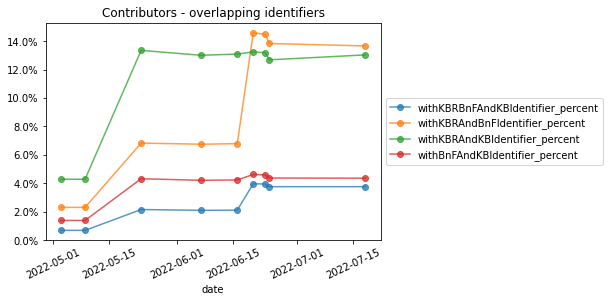

In [6]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 ['withKBRBnFAndKBIdentifier', 'withKBRAndBnFIdentifier',
                                 'withKBRAndKBIdentifier', 'withBnFAndKBIdentifier'],
                                  'Contributors - overlapping identifiers',
                                 'numberContributors')

In the above figure we can see that KBR person authorities have an almost equally overlap with BnF and with KB. Whereas the overlap between all three and the overlap between BnF and KB is smaller. 

This makes sense, considering only BnF and KB, because the translation flow **NL-FR contains more BnF data** and the flow **FR-NL contains more KB data** (see manifestation stats in the previous section). Contributors of FR-NL and NL-FR are different (less overlap), but KBR contains most translation flows in both directions, hence it has a bigger overlap with FR-NL (KB) and NL-FR (BnF).

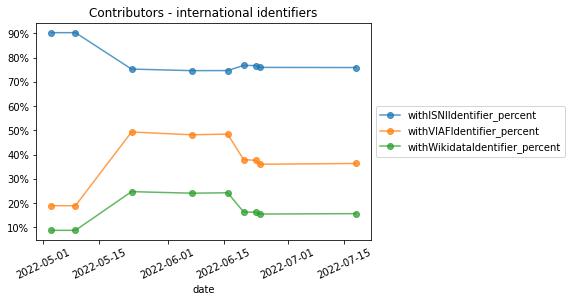

In [7]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withISNIIdentifier', 'withVIAFIdentifier', 'withWikidataIdentifier'],
                                  'Contributors - international identifiers',
                                 'numberContributors')

### KBR insights

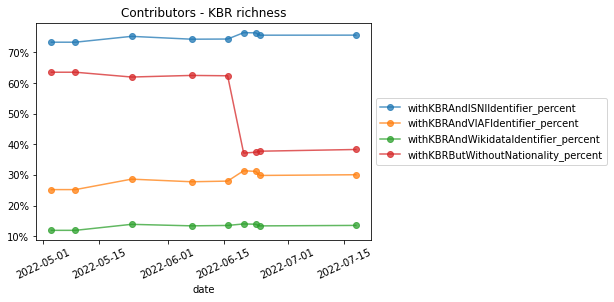

In [8]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 ['withKBRAndISNIIdentifier', 'withKBRAndVIAFIdentifier', 
                                  'withKBRAndWikidataIdentifier', 'withKBRButWithoutNationality'],
                                  'Contributors - KBR richness',
                                 'withKBRIdentifier')

### BnF insights

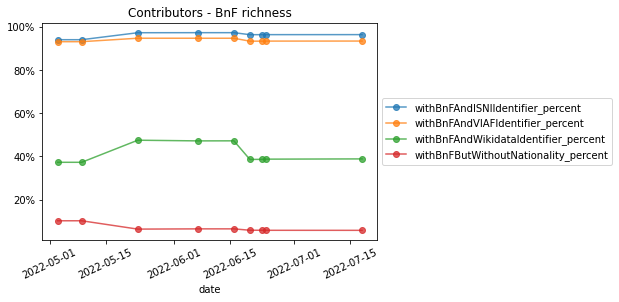

In [9]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 ['withBnFAndISNIIdentifier', 'withBnFAndVIAFIdentifier', 
                                  'withBnFAndWikidataIdentifier', 'withBnFButWithoutNationality'],
                                  'Contributors - BnF richness',
                                 'withBnFIdentifier')

### KB insights

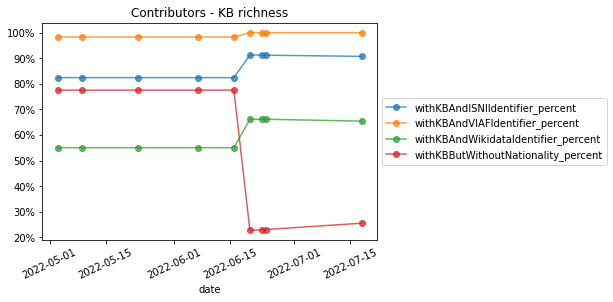

In [10]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 ['withKBAndISNIIdentifier', 'withKBAndVIAFIdentifier', 
                                  'withKBAndWikidataIdentifier', 'withKBButWithoutNationality'],
                                  'Contributors - KB richness',
                                 'withKBIdentifier')

### Duplicate identifiers
For example an authority with 2 KBR identifiers or an authority with 2 ISNI identifiers.

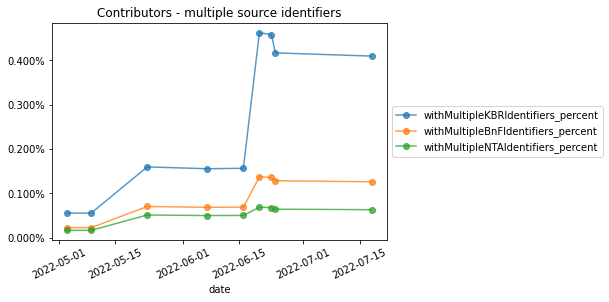

In [11]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  list(map(lambda val: f'withMultiple{val}Identifiers', ['KBR', 'BnF', 'NTA'])),
                                  'Contributors - multiple source identifiers',
                                 'numberContributors')

In [28]:
contributorStats[['numberContributors', 'withMultipleKBRIdentifiers', 'withMultipleBnFIdentifiers', 'withMultipleNTAIdentifiers']].sort_index()

,numberContributors,withMultipleKBRIdentifiers,withMultipleBnFIdentifiers,withMultipleNTAIdentifiers
date,,,,
2022-05-03,48835,27,11,8
2022-05-09,48835,27,11,8
2022-05-23,15681,25,11,8
2022-06-07,16100,25,11,8
2022-06-16,15991,25,11,8
2022-06-20,5843,27,8,4
2022-06-23,5901,27,8,4
2022-06-24,6243,26,8,4
2022-07-18,6352,26,8,4


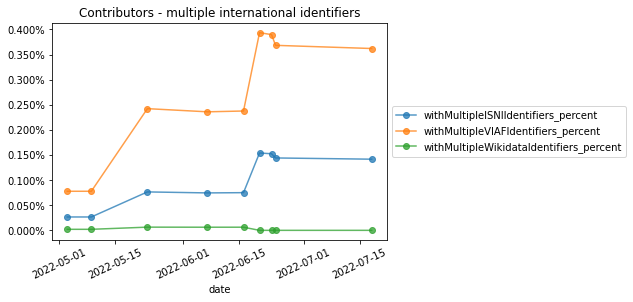

In [12]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  list(map(lambda val: f'withMultiple{val}Identifiers', ['ISNI', 'VIAF', 'Wikidata'])),
                                  'Contributors - multiple international identifiers',
                                 'numberContributors')

In [29]:
contributorStats[['numberContributors', 'withMultipleISNIIdentifiers', 'withMultipleVIAFIdentifiers', 'withMultipleWikidataIdentifiers']].sort_index()

,numberContributors,withMultipleISNIIdentifiers,withMultipleVIAFIdentifiers,withMultipleWikidataIdentifiers
date,,,,
2022-05-03,48835,13,38,1
2022-05-09,48835,13,38,1
2022-05-23,15681,12,38,1
2022-06-07,16100,12,38,1
2022-06-16,15991,12,38,1
2022-06-20,5843,9,23,0
2022-06-23,5901,9,23,0
2022-06-24,6243,9,23,0
2022-07-18,6352,9,23,0


### Identifiers and nationality information

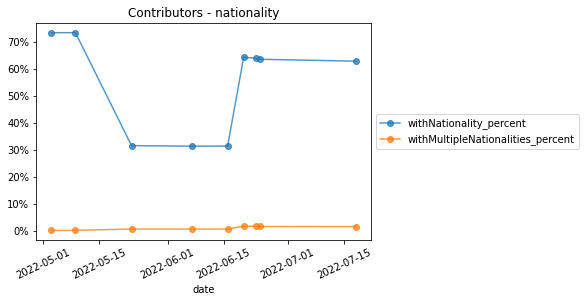

In [13]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withNationality', 'withMultipleNationalities'],
                                  'Contributors - nationality',
                                 'numberContributors')

In [30]:
contributorStats[['numberContributors', 'withNationality', 'withMultipleNationalities']].sort_index()

,numberContributors,withNationality,withMultipleNationalities
date,,,
2022-05-03,48835,35872,134
2022-05-09,48835,35872,134
2022-05-23,15681,4961,119
2022-06-07,16100,5061,120
2022-06-16,15991,5033,120
2022-06-20,5843,3759,105
2022-06-23,5901,3780,105
2022-06-24,6243,3971,106
2022-07-18,6352,3996,107


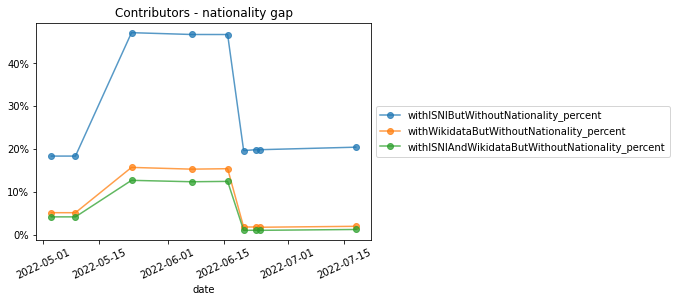

In [14]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withISNIButWithoutNationality', 'withWikidataButWithoutNationality',
                                  'withISNIAndWikidataButWithoutNationality'],
                                  'Contributors - nationality gap',
                                 'numberContributors')

In [31]:
contributorStats[['numberContributors', 'withISNIButWithoutNationality', 'withWikidataButWithoutNationality',
                  'withISNIAndWikidataButWithoutNationality']].sort_index()

,numberContributors,withISNIButWithoutNationality,withWikidataButWithoutNationality,withISNIAndWikidataButWithoutNationality
date,,,,
2022-05-03,48835,8950,2502,2027
2022-05-09,48835,8950,2502,2027
2022-05-23,15681,7387,2460,1987
2022-06-07,16100,7516,2460,1987
2022-06-16,15991,7464,2460,1987
2022-06-20,5843,1146,104,59
2022-06-23,5901,1169,106,61
2022-06-24,6243,1237,108,63
2022-07-18,6352,1296,124,77


Since `2022-06-20`, these numbers are computed based on the persons who are already contributors in the BELTRANS corpus, where we have roughly 20% of persons with ISNI but without nationality. Hence, filling their nationality gap will not necessarily increase the number of books in the corpus, through some collaboration with a known Belgian these contributors are already in the corpus. However, it could be, that there are translations of these persons in the integrated data, without known Belgian collaborations, which we could identify after enriching their nationality.

Between `2022-05-23` and `2022-06-16` there are more than 40% of persons with ISNI but without nationality. These additional 20% may contain Belgians whose works are currently filtered out due to missing nationality information.

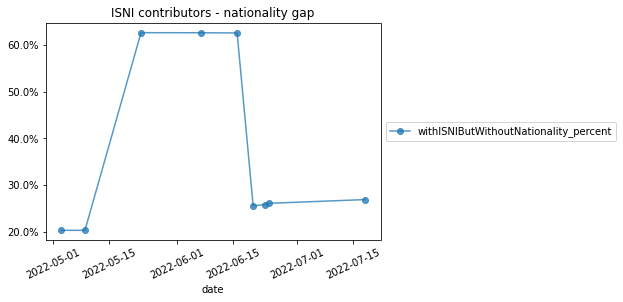

In [18]:
utils_plot.plotPercentageTimeline(contributorStats,
                                 ['withISNIButWithoutNationality'],
                                 'ISNI contributors - nationality gap',
                                 'withISNIIdentifier')

In [19]:
contributorStats[['withISNIIdentifier', 'withISNIButWithoutNationality']]

,withISNIIdentifier,withISNIButWithoutNationality
date,,
2022-05-03,44084,8950
2022-05-23,11803,7387
2022-06-16,11938,7464
2022-05-09,44084,8950
2022-06-07,12013,7516
2022-06-20,4486,1146
2022-06-23,4527,1169
2022-06-24,4742,1237
2022-07-18,4821,1296


### Birth and death dates completeness

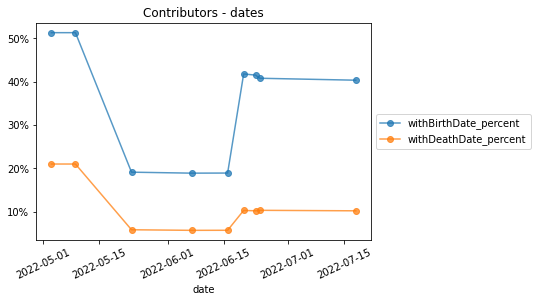

In [15]:
utils_plot.plotPercentageTimeline(contributorStats,
                                  ['withBirthDate', 'withDeathDate'],
                                  'Contributors - dates',
                                 'numberContributors')

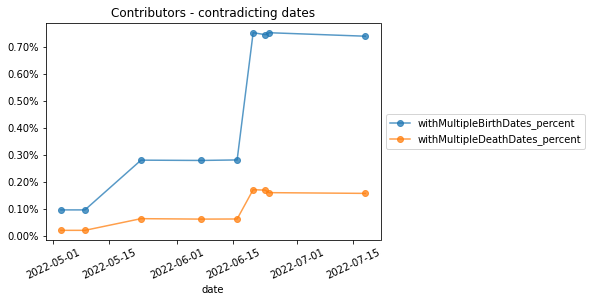

In [16]:
utils_plot.plotPercentageTimeline(contributorStats, 
                                  ['withMultipleBirthDates', 'withMultipleDeathDates'],
                                  'Contributors - contradicting dates',
                                 'numberContributors')

In [17]:
contributorStats

,measurementTime,numberContributors,withKBRIdentifier,withBnFIdentifier,withKBIdentifier,withKBRBnFAndKBIdentifier,withKBRAndBnFIdentifier,withKBRAndKBIdentifier,withBnFAndKBIdentifier,withKBRAndISNIIdentifier,...,withMultipleWikidataIdentifiers_percent,withNationality_percent,withMultipleNationalities_percent,withISNIButWithoutNationality_percent,withWikidataButWithoutNationality_percent,withISNIAndWikidataButWithoutNationality_percent,withBirthDate_percent,withDeathDate_percent,withMultipleBirthDates_percent,withMultipleDeathDates_percent
date,,,,,,,,,,,,,,,,,,,,,
2022-05-03,2022-07-19 11:44:01.921810,48835,12850,3357,6499,338,1127,2094,678,9426,...,0.002048,73.455513,0.274393,18.327020,5.123375,4.150712,51.286987,21.015665,0.096242,0.020477
2022-05-23,2022-07-19 11:44:04.137147,15681,10923,1764,6499,338,1071,2094,678,8221,...,0.006377,31.637013,0.758880,47.107965,15.687775,12.671386,19.137810,5.866973,0.280594,0.063771
2022-06-16,2022-07-19 11:44:05.644896,15991,11233,1779,6499,338,1086,2094,678,8356,...,0.006254,31.473954,0.750422,46.676255,15.383653,12.425739,18.935651,5.746983,0.281408,0.062535
2022-05-09,2022-07-19 11:44:03.074955,48835,12850,3357,6499,338,1127,2094,678,9426,...,0.002048,73.455513,0.274393,18.327020,5.123375,4.150712,51.286987,21.015665,0.096242,0.020477
2022-06-07,2022-07-19 11:44:05.263951,16100,11342,1780,6499,338,1087,2094,678,8431,...,0.006211,31.434783,0.745342,46.683230,15.279503,12.341615,18.913043,5.732919,0.279503,0.062112
2022-06-20,2022-07-19 11:44:06.018339,5843,5214,1231,1063,232,853,774,270,3987,...,0.000000,64.333390,1.797022,19.613212,1.779908,1.009755,41.776485,10.320041,0.753038,0.171145
2022-06-23,2022-07-19 11:44:06.275593,5901,5272,1232,1067,233,854,778,271,4028,...,0.000000,64.056940,1.779359,19.810202,1.796306,1.033723,41.501440,10.235553,0.745636,0.169463
2022-06-24,2022-07-19 11:44:06.380484,6243,5621,1237,1079,235,864,792,273,4252,...,0.000000,63.607240,1.697902,19.814192,1.729938,1.009130,40.781675,10.347589,0.752843,0.160179
2022-07-18,2022-07-19 11:44:06.548095,6352,5711,1241,1134,239,868,828,277,4321,...,0.000000,62.909320,1.684509,20.403023,1.952141,1.212217,40.333753,10.232997,0.739924,0.157431
